<a href="https://colab.research.google.com/github/Th3ProHero/DeepVision/blob/main/DataSetMNIST_NumberClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Dataset de imagenes MNIST

In [183]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [184]:
mnist = tf.keras.datasets.mnist

In [185]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [186]:
x_train.shape

(60000, 28, 28)

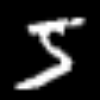

In [187]:
cv2_imshow(cv2.resize(x_train[0],(100,100)))

In [188]:
y_train[0]

5

In [189]:
x_test.shape

(10000, 28, 28)

\2.Dataset de caracteristicas con hog features

In [190]:
img=x_train[1]
def get_hog():
  winSize=img.shape
  blockSize=(8,8)
  blockStride=(2,2)
  cellSize=(4,4)
  nbins=9
  hog=cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
  return hog
hog=get_hog()
hog.compute(img).shape

(4356,)

Calcular para cada imagen

In [191]:
def get_feature_dataset(x):
  features=[]

  for img in x:
    features.append(hog.compute(img))
  features=np.array(features)
  return features

In [192]:
features_train=get_feature_dataset(x_train)
features_test=get_feature_dataset(x_test)

In [193]:
features_train.shape

(60000, 4356)

In [194]:
features_test.shape

(10000, 4356)

3.Definicion e implementacion de la red neuronal +onehot labels

In [195]:
y_trainOneHot = tf.one_hot(y_train,np.max(y_train)+1)
y_testOneHot = tf.one_hot(y_test,np.max(y_train)+1)

In [196]:
y_trainOneHot[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

def classifier(features_train):
    model = Sequential()

    # Define la forma de entrada usando Input
    model.add(Input(shape=(features_train.shape[1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(180, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compila el modelo con el argumento correcto
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
    )

    return model

# Ejemplo de uso (asegúrate de que features_train esté definido)
model = classifier(features_train)
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 200)                 │         871,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 180)                 │          36,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 150)                 │          27,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936,240 (3.57 MB)

 Trainable params: 936,240 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

4.Calculo de la matrix de confusion

In [198]:
#Epocas, cuantas veces se le pasa el dataset, batch es cuantas muestras se van a tomar para calcular el gradiente, en este caso 100 imagenes para calcular el gradiente solo apra esas y actualizar los pesos.
#si hay datasets de teras, una forma de no cargar todo en memoria, es cargar pedazos osea batches, calculamos, y asi de manera secuencial.
model.fit(features_train,y_trainOneHot,epochs=1, batch_size=5000)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.2947


In [199]:
#Evaluar el sistema
prediction_train=model.predict(features_train)
prediction_test=model.predict(features_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [200]:
prediction_train.shape

(60000, 10)

In [201]:
prediction_train[0]

array([0.0778652 , 0.08944925, 0.10610982, 0.09030634, 0.09241936,
       0.10333815, 0.10868353, 0.1080253 , 0.11535747, 0.10844564],
      dtype=float32)

In [202]:
y_pred_train=np.argmax(prediction_train,1)
y_pred_test=np.argmax(prediction_test,1)

In [203]:
y_pred_train

array([8, 6, 5, ..., 9, 5, 9])

In [204]:
errorTrain= 100*np.sum(y_pred_train!=y_train)/len(y_train)
errorTest= 100*np.sum(y_pred_test!=y_test)/len(y_test)
print("Error de entrenamiento:")
print(errorTrain,"%")
print("Error de prueba:")
print(errorTest,"%")

Error de entrenamiento:
87.52333333333333 %
Error de prueba:
87.62 %


4:Matriz de confusion

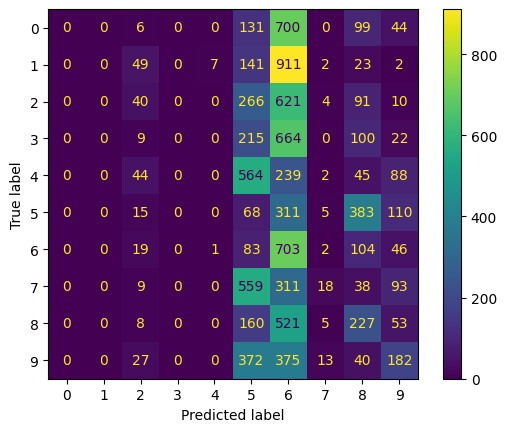

In [205]:
#la matriz de confusion nos indica visualmente cuantos aciertos y fracasos se tienen con el dataset de prueba
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat=confusion_matrix(y_test,y_pred_test)
conf_mat
disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

In [206]:
conf_mat_norm = np.round(100*conf_mat/np.sum(conf_mat,1),1)


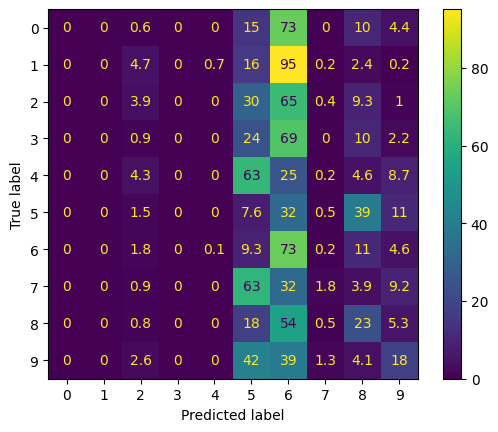

In [207]:
disp2=ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm)
disp2.plot()